Name: Aniruddha Ojha Roll No: BEBD22602 Div B

The Randomized Benchmarking Protocol.

In [23]:
# Import required libraries
import cirq
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Define a single qubit
qubit = cirq.LineQubit(0)

In [27]:
# Function to generate a random Clifford gate
def random_clifford():
    return np.random.choice([cirq.X, cirq.Y, cirq.Z, cirq.H, cirq.S, cirq.I])

In [29]:
# Function to create a randomized benchmarking sequence
def rb_sequence(length):
    circuit = cirq.Circuit()
    for _ in range(length):
        gate = random_clifford()(qubit)
        circuit.append(gate)
    # Add the inverse of all gates to ideally return to |0>
    inverse = cirq.inverse(circuit)
    circuit.append(inverse)
    circuit.append(cirq.measure(qubit, key='m'))
    return circuit


In [31]:
# Parameters
sequence_lengths = [1, 2, 4, 8, 16, 32]  # RB sequence lengths
shots = 1024
fidelities = []

In [33]:
# Simulator
simulator = cirq.Simulator()

In [35]:
# Run RB sequences
for L in sequence_lengths:
    circuit = rb_sequence(L)
    result = simulator.run(circuit, repetitions=shots)
    counts = result.histogram(key='m')
    fidelity = counts.get(0, 0) / shots  # Probability of returning to |0>
    fidelities.append(fidelity)

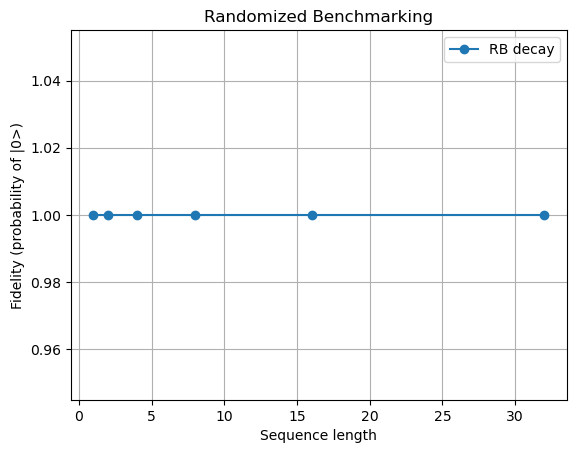

In [37]:
# Plot the decay
plt.plot(sequence_lengths, fidelities, 'o-', label='RB decay')
plt.xlabel('Sequence length')
plt.ylabel('Fidelity (probability of |0>)')
plt.title('Randomized Benchmarking')
plt.grid(True)
plt.legend()
plt.show()